In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
season_21_22 = pd.read_csv('./Basketball_Data/2021-2022_season.csv')

In [3]:
# Drop multiple columns
columns_to_drop = ['Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Arena', 'Notes', 'Start (ET)']
season_21_22.drop(columns=columns_to_drop, axis=1, inplace=True)

season_21_22

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1
0,Tue Oct 19 2021,Brooklyn Nets,104,Milwaukee Bucks,127
1,Tue Oct 19 2021,Golden State Warriors,121,Los Angeles Lakers,114
2,Wed Oct 20 2021,Indiana Pacers,122,Charlotte Hornets,123
3,Wed Oct 20 2021,Chicago Bulls,94,Detroit Pistons,88
4,Wed Oct 20 2021,Boston Celtics,134,New York Knicks,138
...,...,...,...,...,...
1274,Wed Apr 27 2022,Denver Nuggets,98,Golden State Warriors,102
1275,Thu Apr 28 2022,Philadelphia 76ers,132,Toronto Raptors,97
1276,Thu Apr 28 2022,Phoenix Suns,115,New Orleans Pelicans,109
1277,Thu Apr 28 2022,Dallas Mavericks,98,Utah Jazz,96


In [4]:
# Loop through the column names and replace the .1's with Home/Visitor Score
new_column_names = {}
for col in season_21_22.columns:
    if col.endswith('.1'):
        new_column_names[col] = col.replace('PTS.1', 'Home Score')
    elif col.endswith('PTS'):
        new_column_names[col] = col.replace('PTS', 'Visitor Score')

# Rename the columns
season_21_22.rename(columns=new_column_names, inplace=True)

# Rename the Visitor home columns.
season_21_22.rename(columns={
    'Visitor/Neutral': 'Visiting Team',
    'Home/Neutral': 'Home Team'
}, inplace=True)

# Show the DataFrame after renaming columns
season_21_22

,Date,Visiting Team,Visitor Score,Home Team,Home Score
0,Tue Oct 19 2021,Brooklyn Nets,104,Milwaukee Bucks,127
1,Tue Oct 19 2021,Golden State Warriors,121,Los Angeles Lakers,114
2,Wed Oct 20 2021,Indiana Pacers,122,Charlotte Hornets,123
3,Wed Oct 20 2021,Chicago Bulls,94,Detroit Pistons,88
4,Wed Oct 20 2021,Boston Celtics,134,New York Knicks,138
...,...,...,...,...,...
1274,Wed Apr 27 2022,Denver Nuggets,98,Golden State Warriors,102
1275,Thu Apr 28 2022,Philadelphia 76ers,132,Toronto Raptors,97
1276,Thu Apr 28 2022,Phoenix Suns,115,New Orleans Pelicans,109
1277,Thu Apr 28 2022,Dallas Mavericks,98,Utah Jazz,96


In [5]:
# Convert to datetime format
season_21_22['Date'] = pd.to_datetime(season_21_22['Date'], format='%a %b %d %Y')

season_21_22

,Date,Visiting Team,Visitor Score,Home Team,Home Score
0,2021-10-19,Brooklyn Nets,104,Milwaukee Bucks,127
1,2021-10-19,Golden State Warriors,121,Los Angeles Lakers,114
2,2021-10-20,Indiana Pacers,122,Charlotte Hornets,123
3,2021-10-20,Chicago Bulls,94,Detroit Pistons,88
4,2021-10-20,Boston Celtics,134,New York Knicks,138
...,...,...,...,...,...
1274,2022-04-27,Denver Nuggets,98,Golden State Warriors,102
1275,2022-04-28,Philadelphia 76ers,132,Toronto Raptors,97
1276,2022-04-28,Phoenix Suns,115,New Orleans Pelicans,109
1277,2022-04-28,Dallas Mavericks,98,Utah Jazz,96


In [6]:
# Calculate the average of all values in 'Column1'
Visitor_Score_Average = season_21_22['Visitor Score'].mean()
Home_Score_Average = season_21_22['Home Score'].mean()

print(f'Home average is {Home_Score_Average}, Visitor Score Average is {Visitor_Score_Average}. Total Home Court Advantage is {Home_Score_Average-Visitor_Score_Average}')

Home average is 111.3721657544957, Visitor Score Average is 109.64816262705239. Total Home Court Advantage is 1.7240031274433107


In [7]:
# Create new columns for storing days since last game for Visitor and Home teams
season_21_22['Visitor_Last_Game'] = 0
season_21_22['Home_Last_Game'] = 0

# Dictionary to keep track of the last game date for each team
last_game_date = {}

# Loop through each row of the DataFrame
for index, row in season_21_22.iterrows():
    visitor = row['Visiting Team']
    home = row['Home Team']
    current_date = row['Date']

    # Update Visitor_Last_Game
    if visitor in last_game_date:
        season_21_22.at[index, 'Visitor_Last_Game'] = (current_date - last_game_date[visitor]).days
    last_game_date[visitor] = current_date  # Update the last game date for this visitor team

    # Update Home_Last_Game
    if home in last_game_date:
        season_21_22.at[index, 'Home_Last_Game'] = (current_date - last_game_date[home]).days
    last_game_date[home] = current_date  # Update the last game date for this home team
    
season_21_22.head(60)

,Date,Visiting Team,Visitor Score,Home Team,Home Score,Visitor_Last_Game,Home_Last_Game
0,2021-10-19,Brooklyn Nets,104,Milwaukee Bucks,127,0,0
1,2021-10-19,Golden State Warriors,121,Los Angeles Lakers,114,0,0
2,2021-10-20,Indiana Pacers,122,Charlotte Hornets,123,0,0
3,2021-10-20,Chicago Bulls,94,Detroit Pistons,88,0,0
4,2021-10-20,Boston Celtics,134,New York Knicks,138,0,0
5,2021-10-20,Washington Wizards,98,Toronto Raptors,83,0,0
6,2021-10-20,Cleveland Cavaliers,121,Memphis Grizzlies,132,0,0
7,2021-10-20,Houston Rockets,106,Minnesota Timberwolves,124,0,0
8,2021-10-20,Philadelphia 76ers,117,New Orleans Pelicans,97,0,0
9,2021-10-20,Orlando Magic,97,San Antonio Spurs,123,0,0


In [8]:
# Group by 'Visitor_Last_Game' and 'Home_Last_Game' and apply multiple aggregation functions
grouped_df = season_21_22.groupby(['Visitor_Last_Game', 'Home_Last_Game']).agg(
    Count=('Visitor_Last_Game', 'size'),
    Visitor_Score_Mean=('Visitor Score', 'mean'),
    Home_Score_Mean=('Home Score', 'mean')
).reset_index()

grouped_df

,Visitor_Last_Game,Home_Last_Game,Count,Visitor_Score_Mean,Home_Score_Mean
0,0,0,14,108.642857,113.428571
1,0,2,1,113.000000,115.000000
2,1,1,46,110.608696,112.304348
3,1,2,150,109.853333,112.640000
4,1,3,46,106.152174,111.478261
5,1,4,4,111.250000,116.500000
6,1,9,1,129.000000,125.000000
7,2,0,1,95.000000,137.000000
8,2,1,90,109.322222,108.388889
9,2,2,544,109.294118,110.988971


In [9]:
filtered_df = grouped_df.query("Visitor_Last_Game != Home_Last_Game")
filtered_df

,Visitor_Last_Game,Home_Last_Game,Count,Visitor_Score_Mean,Home_Score_Mean
1,0,2,1,113.000000,115.000000
3,1,2,150,109.853333,112.640000
4,1,3,46,106.152174,111.478261
5,1,4,4,111.250000,116.500000
6,1,9,1,129.000000,125.000000
7,2,0,1,95.000000,137.000000
8,2,1,90,109.322222,108.388889
10,2,3,109,109.376147,110.055046
11,2,4,24,113.750000,118.333333
12,2,6,1,132.000000,117.000000


In [10]:
# Filter rows where 'Count' is less than 5
strip_small_samples = filtered_df[filtered_df['Count'] >= 5]

strip_small_samples

,Visitor_Last_Game,Home_Last_Game,Count,Visitor_Score_Mean,Home_Score_Mean
3,1,2,150,109.853333,112.640000
4,1,3,46,106.152174,111.478261
8,2,1,90,109.322222,108.388889
10,2,3,109,109.376147,110.055046
11,2,4,24,113.750000,118.333333
16,3,1,30,115.133333,110.600000
17,3,2,101,109.633663,111.198020
19,3,4,7,108.285714,107.000000
21,4,1,8,118.000000,112.250000
22,4,2,12,110.416667,117.083333


In [11]:
# Calculate the score difference
strip_small_samples['Score_Diff'] = strip_small_samples['Home_Score_Mean'] - strip_small_samples['Visitor_Score_Mean']
strip_small_samples

/var/folders/2c/tr3ggy4904g5pqdkqt7wqyym0000gn/T/ipykernel_65738/3123706657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strip_small_samples['Score_Diff'] = strip_small_samples['Home_Score_Mean'] - strip_small_samples['Visitor_Score_Mean']


,Visitor_Last_Game,Home_Last_Game,Count,Visitor_Score_Mean,Home_Score_Mean,Score_Diff
3,1,2,150,109.853333,112.640000,2.786667
4,1,3,46,106.152174,111.478261,5.326087
8,2,1,90,109.322222,108.388889,-0.933333
10,2,3,109,109.376147,110.055046,0.678899
11,2,4,24,113.750000,118.333333,4.583333
16,3,1,30,115.133333,110.600000,-4.533333
17,3,2,101,109.633663,111.198020,1.564356
19,3,4,7,108.285714,107.000000,-1.285714
21,4,1,8,118.000000,112.250000,-5.750000
22,4,2,12,110.416667,117.083333,6.666667


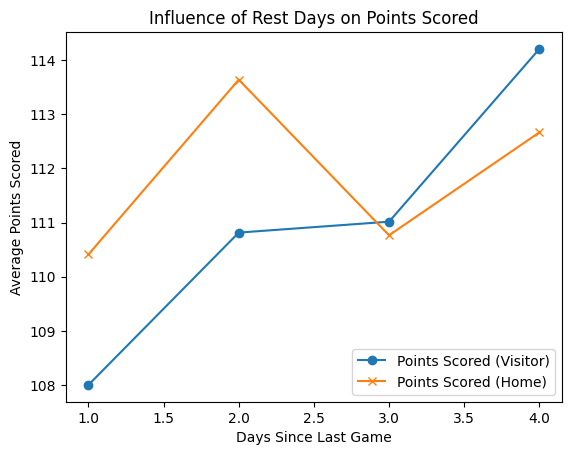

In [12]:
# Separate data for home and visitor
visitor_data = strip_small_samples.groupby('Visitor_Last_Game').mean()['Visitor_Score_Mean']
home_data = strip_small_samples.groupby('Home_Last_Game').mean()['Home_Score_Mean']

# Plot Visitor
plt.plot(visitor_data.index, visitor_data.values, label='Points Scored (Visitor)', marker='o')

# Plot Home
plt.plot(home_data.index, home_data.values, label='Points Scored (Home)', marker='x')

plt.xlabel('Days Since Last Game')
plt.ylabel('Average Points Scored')
plt.title('Influence of Rest Days on Points Scored')
plt.legend()

plt.show()

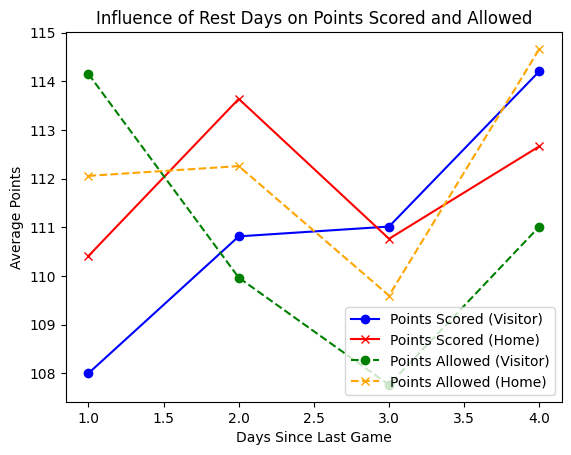

In [13]:

# Separate data for points scored
visitor_score_data = strip_small_samples.groupby('Visitor_Last_Game').mean()['Visitor_Score_Mean']
home_score_data = strip_small_samples.groupby('Home_Last_Game').mean()['Home_Score_Mean']

# Separate data for points allowed
visitor_allowed_data = strip_small_samples.groupby('Home_Last_Game').mean()['Visitor_Score_Mean']
home_allowed_data = strip_small_samples.groupby('Visitor_Last_Game').mean()['Home_Score_Mean']

# Plot Points Scored (Visitor)
plt.plot(visitor_score_data.index, visitor_score_data.values, label='Points Scored (Visitor)', marker='o', color='blue')

# Plot Points Scored (Home)
plt.plot(home_score_data.index, home_score_data.values, label='Points Scored (Home)', marker='x', color='red')

# Plot Points Allowed (Visitor)
plt.plot(visitor_allowed_data.index, visitor_allowed_data.values, label='Points Allowed (Visitor)', marker='o', linestyle='--', color='green')

# Plot Points Allowed (Home)
plt.plot(home_allowed_data.index, home_allowed_data.values, label='Points Allowed (Home)', marker='x', linestyle='--', color='orange')

plt.xlabel('Days Since Last Game')
plt.ylabel('Average Points')
plt.title('Influence of Rest Days on Points Scored and Allowed')
plt.legend()
plt.savefig("day-off.png")
plt.show()